In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from quilt.data.ResidentMario import missingno_data
import missingno as msno
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split


In [61]:
dstrain = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\train.csv" , low_memory = False)
dstore = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\store.csv")

In [62]:
dstrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [63]:
dstrain.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [64]:
dstrain.shape


(1017209, 9)

In [65]:
dstrain.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [66]:
dstore.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [67]:
dstore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [68]:
dstrain.shape

(1017209, 9)

In [69]:
dstrain.count(0)
#Toutes les colonnes sont remplies

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [70]:
print(" nombre des magasins fermés certains jours : {}".format(dstrain[(dstrain.Open == 0)].count()[0]))  
print(" dont pour uniquement vacances scolaires : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 1) & (dstrain.StateHoliday == '0')].count()[0]))    
print(" et pour StateHolidays (hors vacances scolaires) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 0 ) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour StateHolidays (vacances scolaires comprises) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour aucune de ces raisons : {} ".format(dstrain[(dstrain.Open == 0) & (dstrain. StateHoliday == '0') & (dstrain.SchoolHoliday == 0)].count()[0])) 

 nombre des magasins fermés certains jours : 172817
 dont pour uniquement vacances scolaires : 3067
 et pour StateHolidays (hors vacances scolaires) : 25255
 et pour StateHolidays (vacances scolaires comprises) : 30356
 et pour aucune de ces raisons : 139610 


In [71]:
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Jan,Apr,Jul,Oct')].count()[0]))
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Feb,May,Aug,Nov')].count()[0]))
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Mar,Jun,Sept,Dec')].count()[0]))
print("nombre lignes vides : {}".format(dstore[~dstore['PromoInterval'].isnull()].count()))

print(" nombre promo2 = 0 et Promo2sinceWeek = Nan : {}".format(dstore[~dstore['Promo2SinceWeek'].isnull() & (dstore.Promo2 == 0)].count()[0]))


nombre lignes avec promo démarrant en Janvier : 335
nombre lignes avec promo démarrant en Janvier : 130
nombre lignes avec promo démarrant en Janvier : 106
nombre lignes vides : Store                        571
StoreType                    571
Assortment                   571
CompetitionDistance          570
CompetitionOpenSinceMonth    365
CompetitionOpenSinceYear     365
Promo2                       571
Promo2SinceWeek              571
Promo2SinceYear              571
PromoInterval                571
dtype: int64
 nombre promo2 = 0 et Promo2sinceWeek = Nan : 0


In [72]:
# Les magasins fermés pour aucune raison doivent-ils être supprimés ? Bonne question ? ça dépend de ce que l'on cherche à prédire 
# TODO : tester sur dstrain et dstrain_old en gardant ces données suspectes

In [73]:
dstrain[(dstrain.Open == 0)].count()[0]

172817

In [74]:
print(" Magasins ouverts avec 0 ventes : {}".format(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].count()[0]))
# Aberrant ou pas ? Discussion à venir

 Magasins ouverts avec 0 ventes : 54


In [75]:
#dstrain = dstrain.drop(dstrain[(dstrain.Open == 0) & (dstrain.Sales == 0)].index)
#dstrain.shape
#dstrain.reset_index(drop=True)

In [76]:
# Un peu de statistiques et de Data Viz :) 


In [18]:
#Sales : 
dstrain.Sales.describe()
# Pour Sales, il faut enlever les lignes qui correspondent au cas : Open = 1 & Sales = 0
#dstrain["Sales"]
#dstrain=dstrain.drop(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].index)
#dstrain = dstrain.reset_index(drop=True) 

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

(0, 41551)

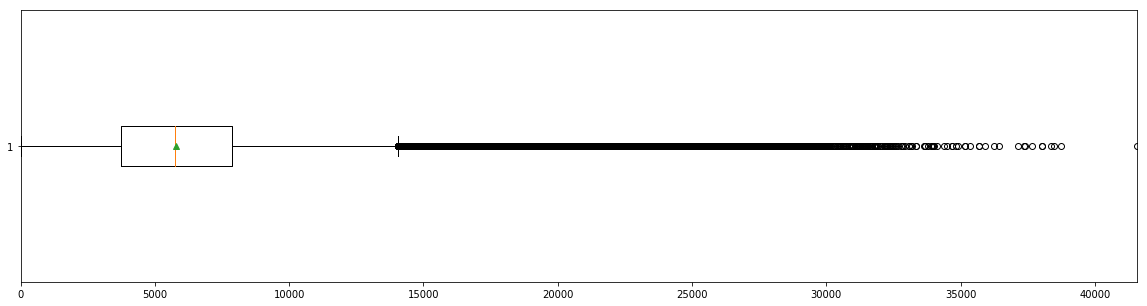

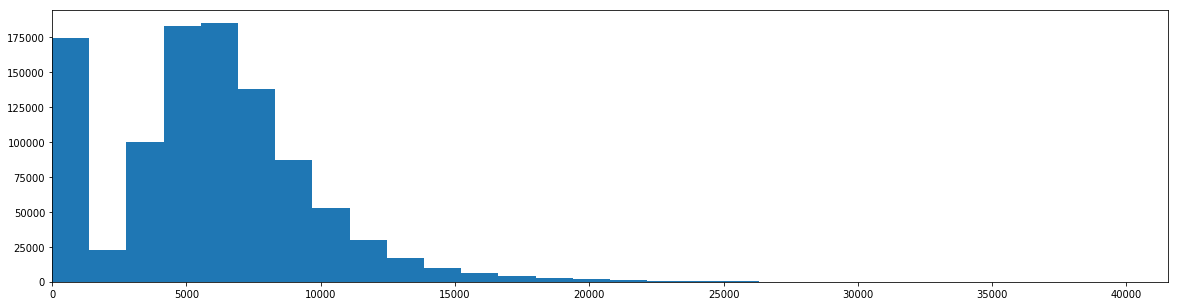

In [19]:
fig1 , ax1 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax1.boxplot(dstrain.Sales , showmeans=True , vert=False)
ax1.set_xlim(0, max(dstrain["Sales"]))
fig2 , ax2 = plt.subplots(1 , 1 , figsize = (20 , 5))

ax2.hist(dstrain.Sales , cumulative = False , bins = 30 )
ax2.set_xlim((min(dstrain.Sales) , max(dstrain.Sales)))

In [20]:
print("mean : {}".format(np.mean(dstrain.Sales)))
print("median : {} ".format(np.median(dstrain.Sales)))


mean : 5773.818972305593
median : 5744.0 


In [21]:
# Il y a des magasins qui font de très grandes ventes (>15.000 par exemple) est-ce normal ou dû à des erreurs dans la BD ? Point à disucter TODO !!
# Quantité de ces données : 
print("pourcentage des ventes > 15.000 : {}".format(dstrain[dstrain.Sales>15000].count()[0]/dstrain.shape[0] * 100))

# dstrain[dstrain.Sales>15000]
# C'est normal, + de ventes et visites en période de soldes/vacances


pourcentage des ventes > 15.000 : 2.3368603568713002


In [22]:
#Idem pour customers : 


In [23]:
dstrain.Customers.describe()


count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

(8, 7388)

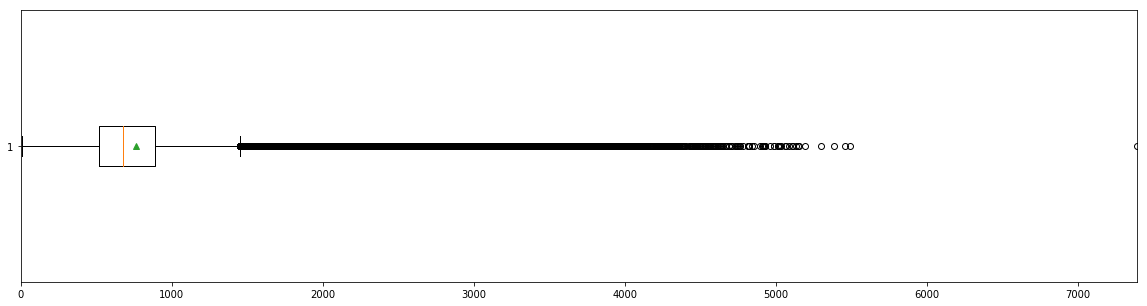

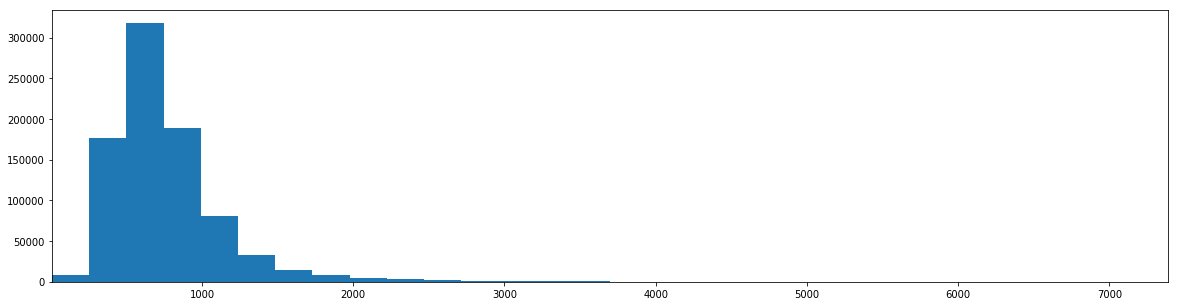

In [24]:
fig1 , ax1 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax1.boxplot(dstrain.Customers , showmeans=True , vert=False)
ax1.set_xlim(0, max(dstrain["Customers"]))

fig2 , ax2 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax2.hist(dstrain.Customers , cumulative = False , bins = 30 )
ax2.set_xlim((min(dstrain.Customers) , max(dstrain.Customers)))

In [25]:
print("pourcentage du nombre de clients > 2000 : {}".format(dstrain[dstrain.Customers>2000].count()[0]/dstrain.shape[0] * 100))


pourcentage du nombre de clients > 2000 : 1.7447988838593074


In [21]:
#stats : Corrélation de Pearson
stats.pearsonr(dstrain.Sales , dstrain.Customers)

#Forte corrélation (entre 0.5 et 1.0)

(0.8947107733017011, 0.0)

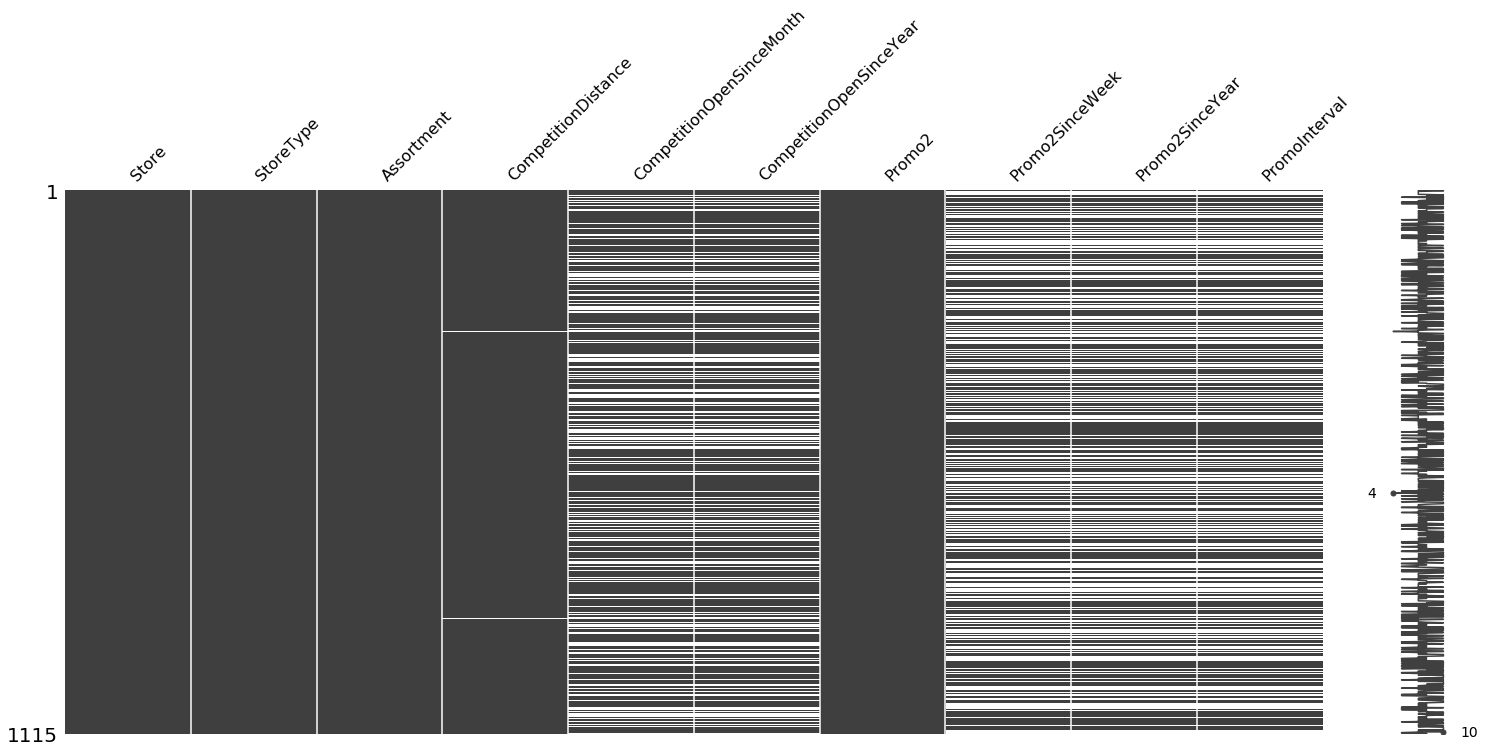

In [22]:
msno.matrix(dstore)

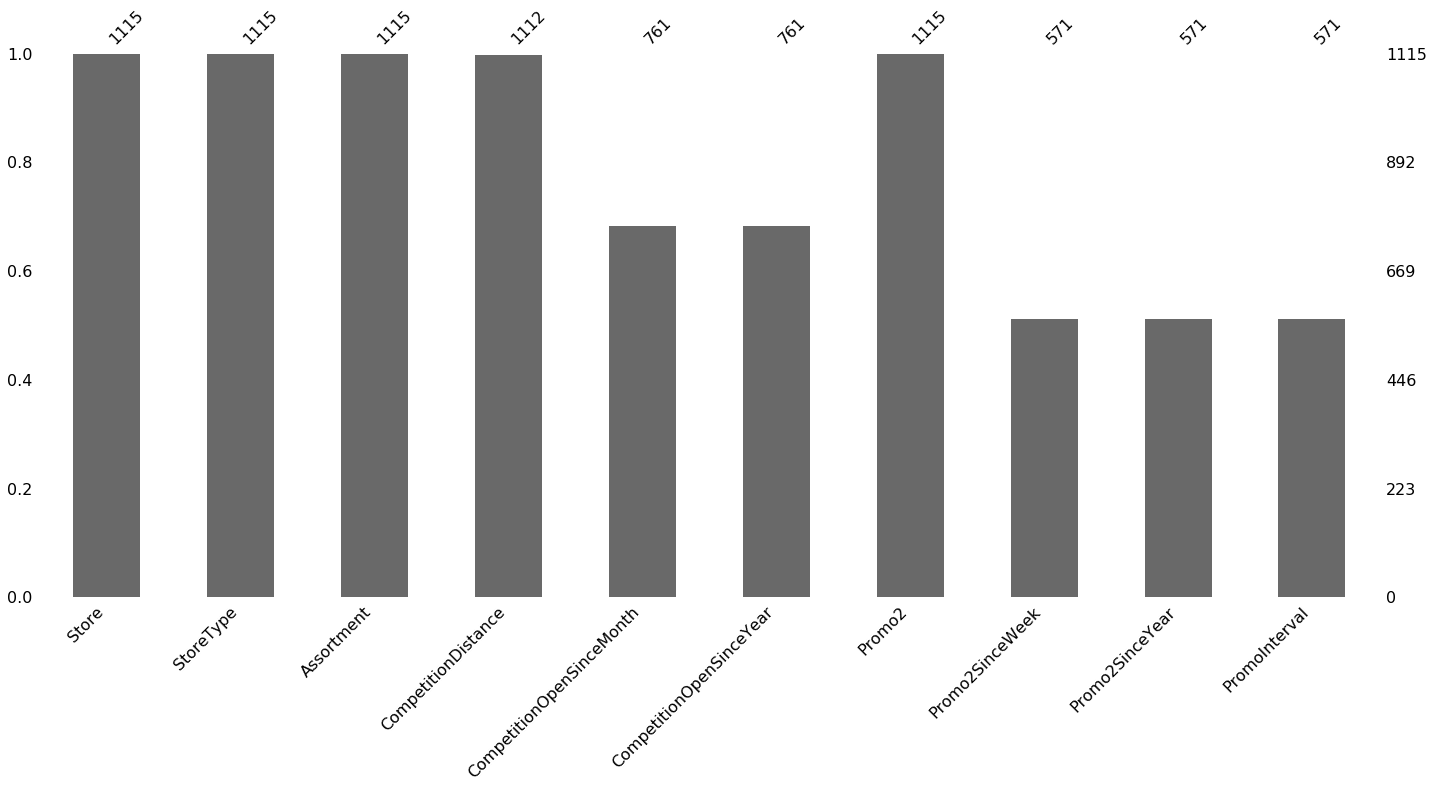

In [23]:
msno.bar(dstore)

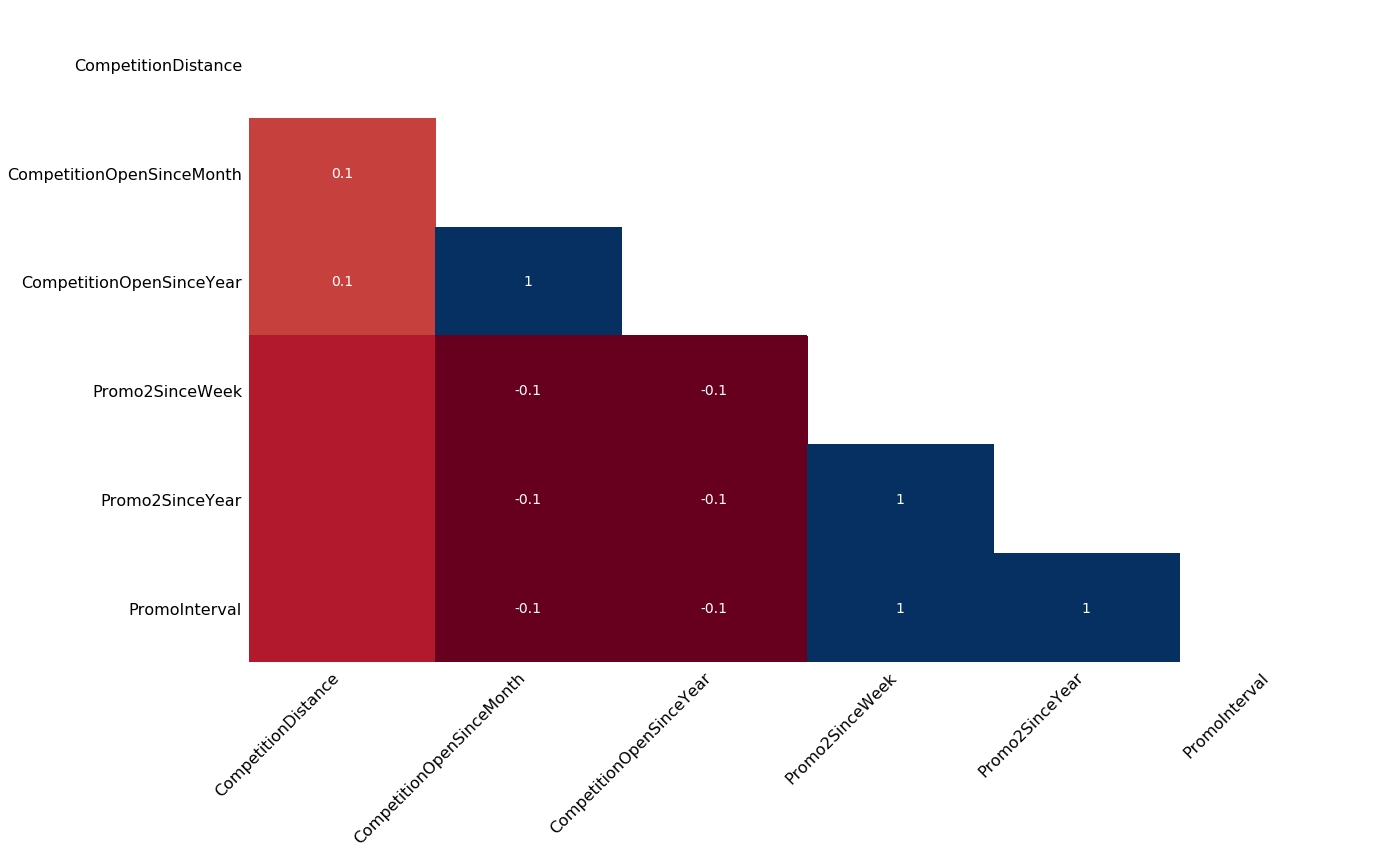

In [24]:
msno.heatmap(dstore)


In [77]:
dstore.Promo2SinceYear[dstore.Promo2 == 0]= int(0)
dstore.Promo2SinceWeek[dstore.Promo2 == 0]= int(0)


C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#msno.dendrogram(dstore)
dstore.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [79]:
dstore['PromoJan'] = 0
dstore['PromoFeb'] = 0
dstore['PromoMar'] = 0
dstore.PromoJan[dstore.PromoInterval == 'Jan,Apr,Jul,Oct']= 1
dstore.PromoFeb[dstore.PromoInterval == 'Feb,May,Aug,Nov']=1
dstore.PromoMar[dstore.PromoInterval == 'Mar,Jun,Sept,Dec']=1

C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
del dstore['PromoInterval']


In [81]:
dstore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,0,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0,0,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,0,0,0
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,0,0,1


In [82]:
dstore.CompetitionOpenSinceMonth.fillna(0, inplace = True)
dstore.CompetitionOpenSinceYear.fillna(0,inplace=True)
dstore['CompetitionDistance'].fillna(dstore['CompetitionDistance'].median(), inplace = True)


In [83]:
dts = pd.merge(dstrain, dstore, how = 'left', on = 'Store')


In [32]:
dts[dts.Open == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0,0
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,0,1,0
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0,0
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,0,1,0
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0,0
3105,876,3,2015-07-29,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,0,1,0
3636,292,2,2015-07-28,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0,0
4220,876,2,2015-07-28,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,0,1,0
4751,292,1,2015-07-27,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0,0
5335,876,1,2015-07-27,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,0,1,0


In [84]:
dts['SalesperCustomer'] = dts['Sales']/dts['Customers']

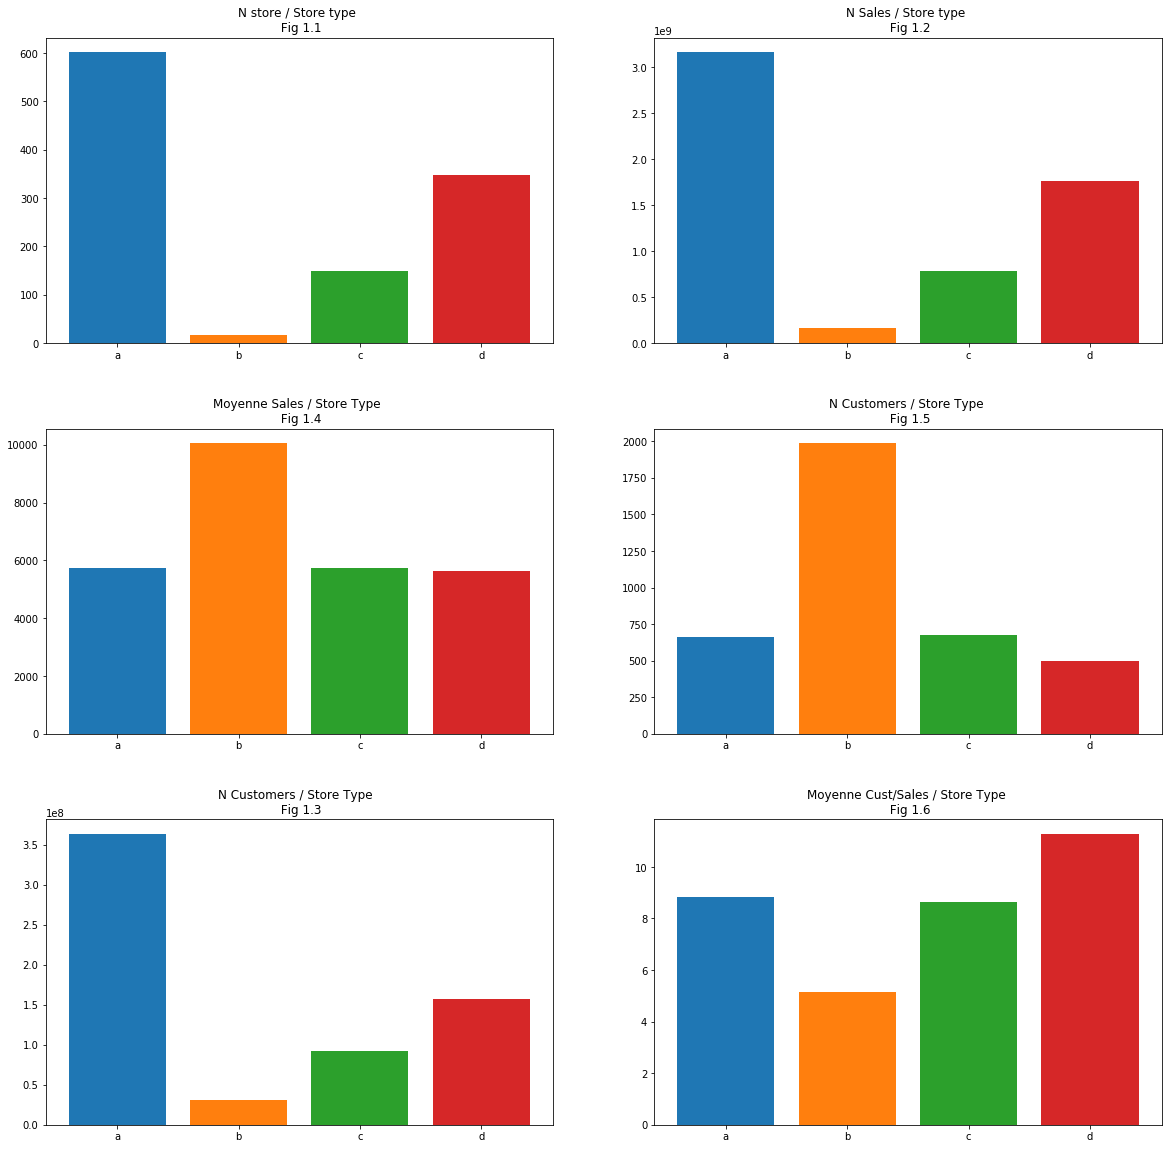

In [85]:
fig, axes = plt.subplots(3, 2,figsize=(20,20) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(dstore.groupby(by="StoreType").count().Store.index,dstore.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("N store / Store type \n Fig 1.1")
axes[0,1].bar(dts.groupby(by="StoreType").sum().Sales.index,dts.groupby(by="StoreType").sum().Sales,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("N Sales / Store type \n Fig 1.2")
axes[2,0].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").sum().Customers,color=[next(palette),next(palette),next(palette),next(palette)])
axes[2,0].set_title("N Customers / Store Type  \n Fig 1.3")
axes[1,0].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Moyenne Sales / Store Type \n Fig 1.4")
axes[1,1].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("N Customers / Store Type \n Fig 1.5")
axes[2,1].bar(dts.groupby(by="StoreType").sum().Sales.index,dts.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[2,1].set_title("Moyenne Cust/Sales / Store Type \n Fig 1.6")
plt.show()

In [87]:
dstore.groupby(by=["StoreType","Assortment"]).Assortment.count()


StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

In [88]:
dts.shape
#msno.heatmap(dts)
dts.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar,SalesperCustomer
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,844340.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.881630e-01,1.165896e-01,9.581119e-02,9.493619
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,4.529076e-01,3.209308e-01,2.943323e-01,2.197494
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.895563
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,9.250000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,1.000000e+00,0.000000e+00,0.000000e+00,10.899729
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,64.957854


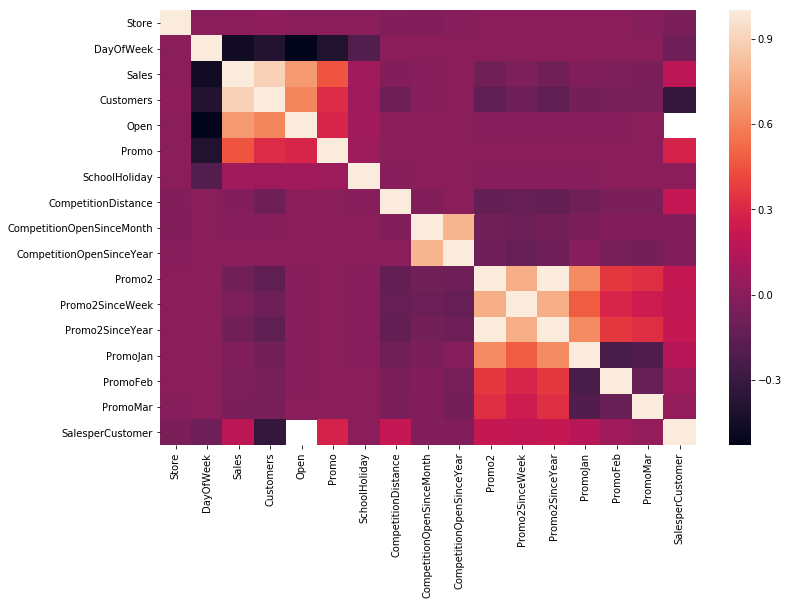

<Figure size 432x288 with 0 Axes>

In [89]:
#Identify numerical columns to produce a heatmap
catcols = []
numcols = [x for x in dts.columns if x not in catcols]
plt.figure(figsize = (12,8))
sns.heatmap(data=dts[numcols].corr())
plt.show()
plt.gcf().clear()

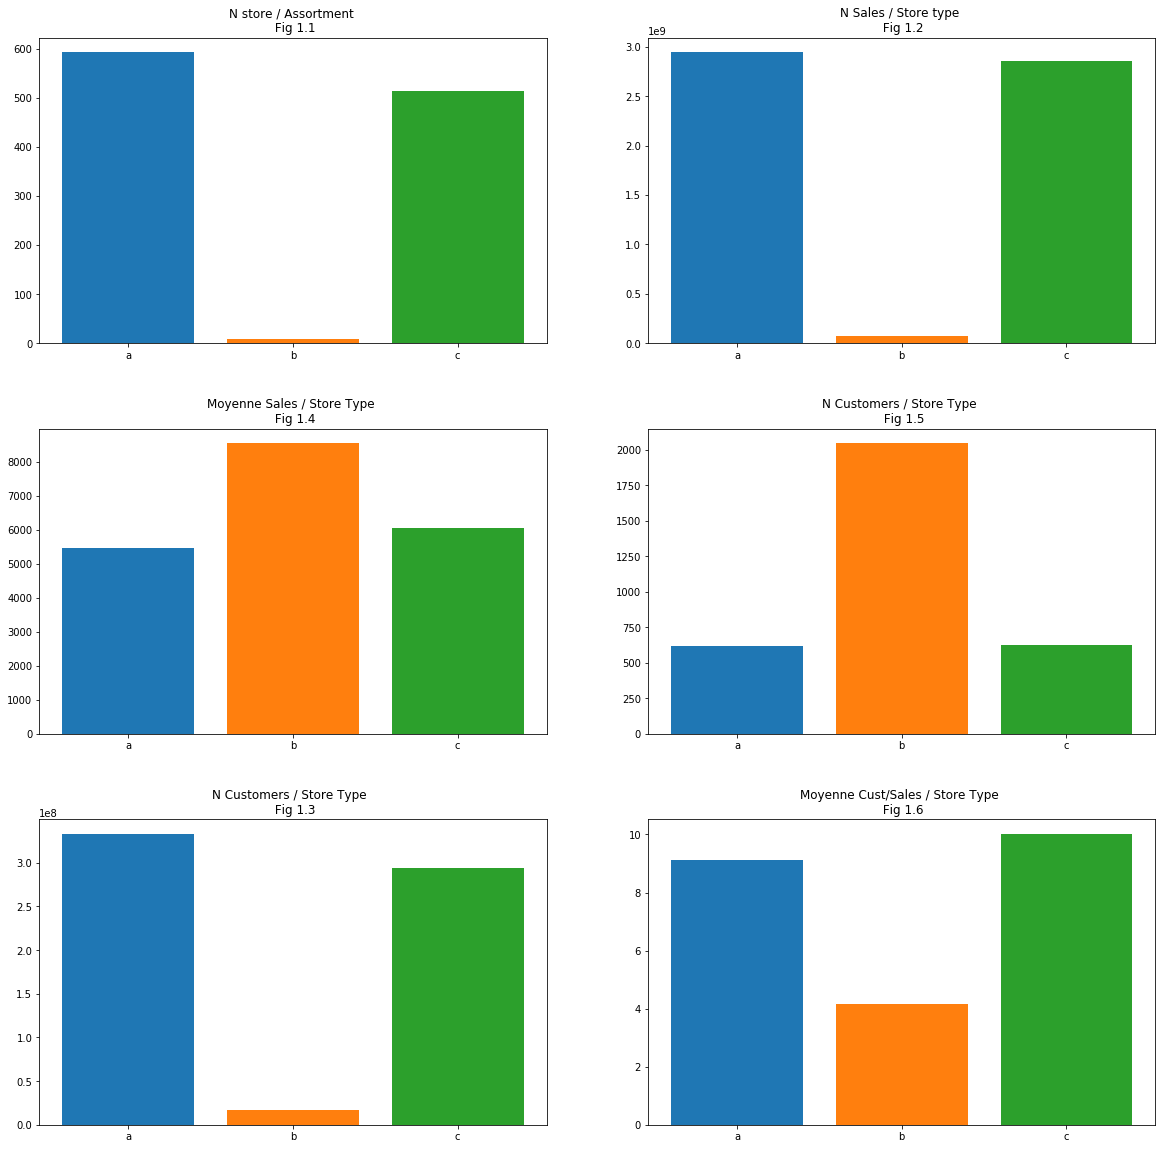

In [90]:
fig, axes = plt.subplots(3, 2,figsize=(20,20) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(dstore.groupby(by="Assortment").count().Store.index,dstore.groupby(by="Assortment").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("N store / Assortment \n Fig 1.1")
axes[0,1].bar(dts.groupby(by="Assortment").sum().Sales.index,dts.groupby(by="Assortment").sum().Sales,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("N Sales / Assortment type \n Fig 1.2")
axes[2,0].bar(dts.groupby(by="Assortment").sum().Customers.index,dts.groupby(by="Assortment").sum().Customers,color=[next(palette),next(palette),next(palette),next(palette)])
axes[2,0].set_title("N Customers / Assortment Type  \n Fig 1.3")
axes[1,0].bar(dts.groupby(by="Assortment").sum().Customers.index,dts.groupby(by="Assortment").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Moyenne Sales / Assortment Type \n Fig 1.4")
axes[1,1].bar(dts.groupby(by="Assortment").sum().Customers.index,dts.groupby(by="Assortment").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("N Customers / Assortment Type \n Fig 1.5")
axes[2,1].bar(dts.groupby(by="Assortment").sum().Sales.index,dts.groupby(by="Assortment").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[2,1].set_title("Moyenne Cust/Sales / Assortment Type \n Fig 1.6")
plt.show()

Data visualition Promo :

In [91]:
dts['year'] = dts['Date'].apply(lambda x: x.split("-")[0])
dts['month'] = dts['Date'].apply(lambda x: x.split("-")[1])
dts['day'] = dts['Date'].apply(lambda x: x.split("-")[2])
dts['DateTime'] = pd.to_datetime(dts[['year','month', 'day']])

dts = dts.drop(['Date'],axis=1)

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar,SalesperCustomer,year,month,day,DateTime
0,1,5263,555,1,1,0,1,c,a,1270.0,...,0.0,0.0,0,0,0,9.482883,2015,07,31,2015-07-31
1,2,6064,625,1,1,0,1,a,a,570.0,...,13.0,2010.0,1,0,0,9.702400,2015,07,31,2015-07-31
2,3,8314,821,1,1,0,1,a,a,14130.0,...,14.0,2011.0,1,0,0,10.126675,2015,07,31,2015-07-31
3,4,13995,1498,1,1,0,1,c,c,620.0,...,0.0,0.0,0,0,0,9.342457,2015,07,31,2015-07-31
4,5,4822,559,1,1,0,1,a,a,29910.0,...,0.0,0.0,0,0,0,8.626118,2015,07,31,2015-07-31
5,6,5651,589,1,1,0,1,a,a,310.0,...,0.0,0.0,0,0,0,9.594228,2015,07,31,2015-07-31
6,7,15344,1414,1,1,0,1,a,c,24000.0,...,0.0,0.0,0,0,0,10.851485,2015,07,31,2015-07-31
7,8,8492,833,1,1,0,1,a,a,7520.0,...,0.0,0.0,0,0,0,10.194478,2015,07,31,2015-07-31
8,9,8565,687,1,1,0,1,a,c,2030.0,...,0.0,0.0,0,0,0,12.467249,2015,07,31,2015-07-31
9,10,7185,681,1,1,0,1,a,a,3160.0,...,0.0,0.0,0,0,0,10.550661,2015,07,31,2015-07-31


In [44]:
#dts = dts.drop(['month','year','day'],axis=1)

In [94]:
dts.dtypes

Store                                 int64
DayOfWeek                             int64
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoJan                              int64
PromoFeb                              int64
PromoMar                              int64
SalesperCustomer                    float64
year                                 object
month                                object
day                             

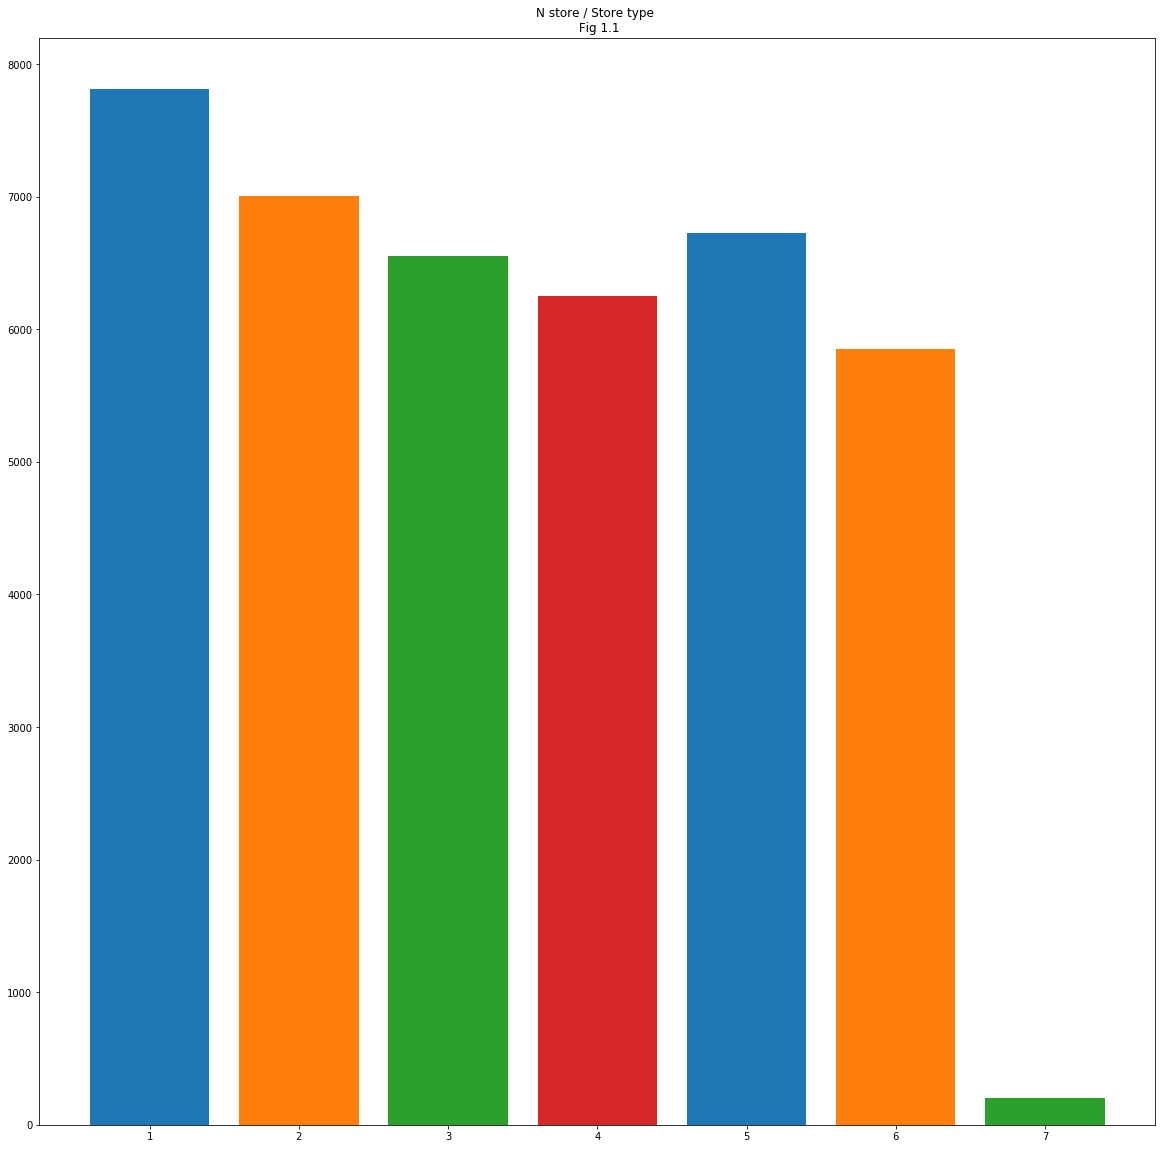

In [105]:
#sns.tsplot(data=dts, time="DayOfWeek", unit="Store",
#           condition="StoreType", value="Sales")
# plt.show()

fig, axes = plt.subplots(1, 1,figsize=(20,20) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes.bar(dts.groupby(by="DayOfWeek").mean().Sales.index,dts.groupby(by="DayOfWeek").mean().Sales,color=[next(palette),next(palette),next(palette),next(palette)])
axes.set_title("N sales / day of week \n Fig 1.1")
plt.show()

In [104]:
dts[(dts.Open == 1) & (dts.DayOfWeek == 7)].sum().Sales

29551433

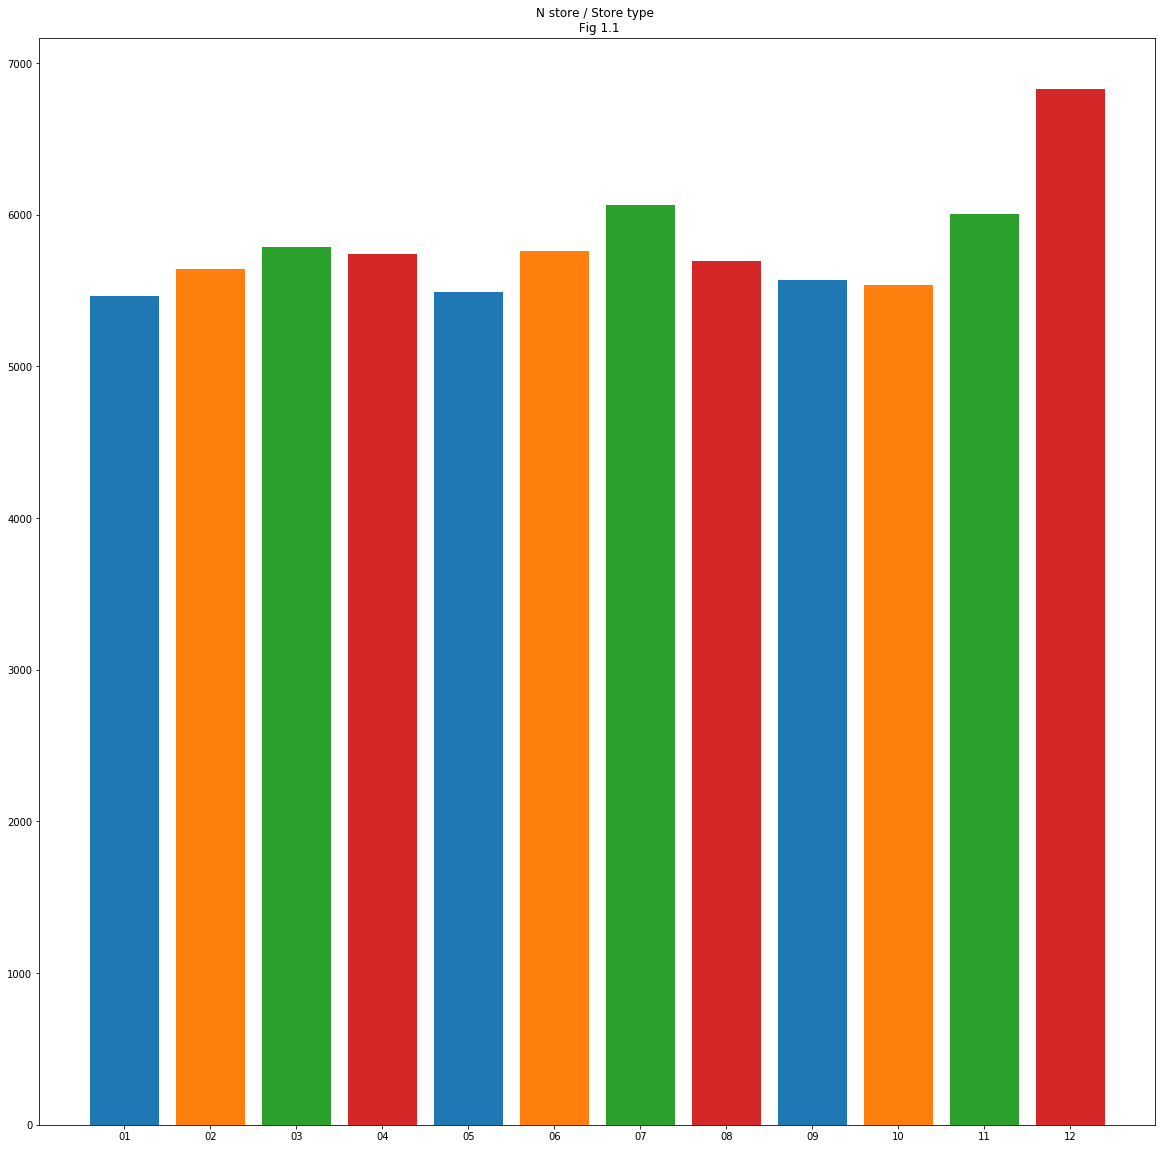

In [106]:
fig, axes = plt.subplots(1, 1,figsize=(20,20) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes.bar(dts.groupby(by="month").mean().Sales.index,dts.groupby(by="month").mean().Sales,color=[next(palette),next(palette),next(palette),next(palette)])
axes.set_title("N store / Store type \n Fig 1.1")
plt.show()